In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%pylab inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

Populating the interactive namespace from numpy and matplotlib


In [31]:
path_to_file = r'/Users/gulsumkapanoglu/Desktop/P4/'

In [32]:
energy = pd.read_csv(path_to_file + '2016_Building_Energy_Benchmarking.csv')

In [33]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [34]:
energy.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Cleaning and feature engineering

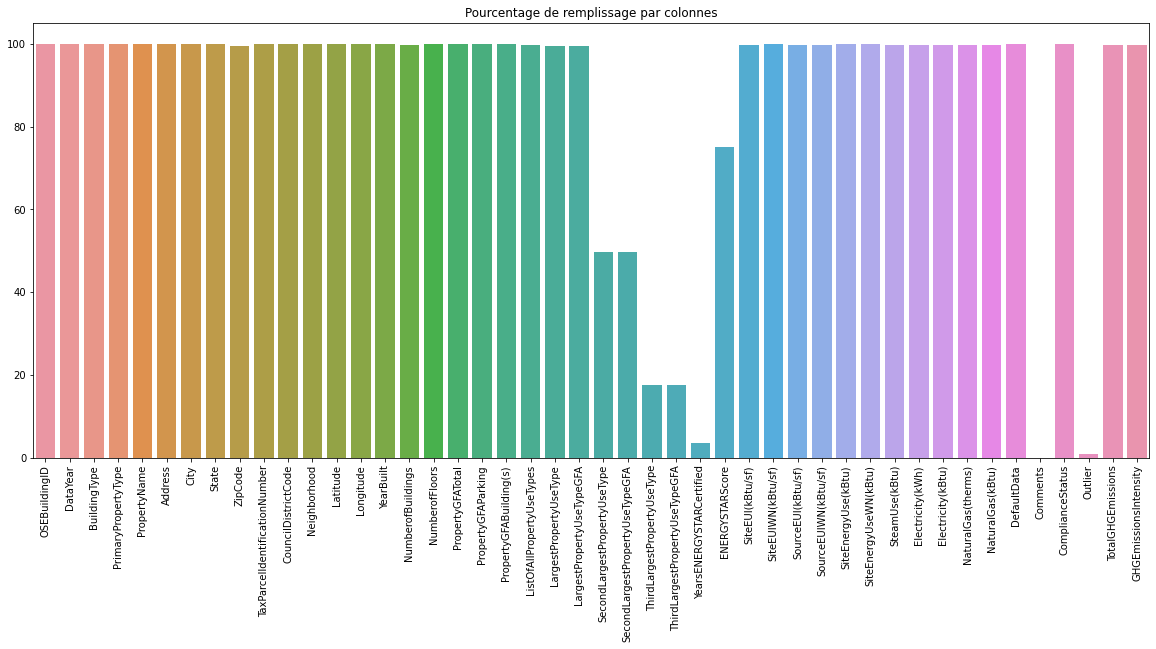

In [35]:
nb_row=energy.shape[0]

percentage=energy.apply(lambda x:(x.notna().sum()/nb_row)*100)

columns=energy.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [36]:
pd.DataFrame([energy.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,int64,int64,object,object,object,object,object,object,float64,object,int64,object,float64,float64,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,object,object,float64,float64


### Y a-t-il un bâtiment en double ?

In [37]:
duplicate_building = energy.drop_duplicates(subset=['OSEBuildingID'], keep='last')


In [38]:
duplicate_building 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

### Dans le cadre du projet, il est précisé que seuls les bâtiments non résidentiels seront étudiés. Donc Nous allons supprimer toutes les lignes correspondant à des habitations.

In [39]:
energy['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

**NonResidential**: Hotel, Other, Mixed Use Property, College/University, Small- and Mid-Sized Office, Self-Storage Facility, K-12 School, Large Office, Retail Store, Senior Care Community, Medical Office, Hospital, Residence Hall/Dormitory, Non-Refrigerated Warehouse, Worship Facility, Supermarket/Grocery Store, Distribution Center, Refrigerated Warehouse, Restaurant, Low-Rise Multifamily, University, Warehouse, Residence Hall, Laboratory,

**Nonresidential COS**: Other, Non-Refrigerated Warehouse, Small- and Mid-Sized Office, Distribution Center, Large Office, Mixed Use Property, Medical Office, Warehouse, Office,

**Multifamily MR (5-9)**: Mid-Rise Multifamily, Mixed Use Property, Senior Care Community, Other, Residence Hall,

**SPS-District K-12**: K-12 School, Other

**Campus**: College/University, Large Office, Other, Mixed Use Property, K-12 School, Low-Rise Multifamily, Restaurant, University,

**Multifamily LR (1-4)**: Low-Rise Multifamily, Mixed Use Property, Other, Senior Care Community, Small- and Mid-Sized Office, College/University, University,

**Multifamily HR (10+)**: High-Rise Multifamily, Other, Senior Care Community, Hotel,

**Nonresidential WA**: University,

In [40]:
energy = energy[~energy['BuildingType'].str.contains("Multifamily")]
energy['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

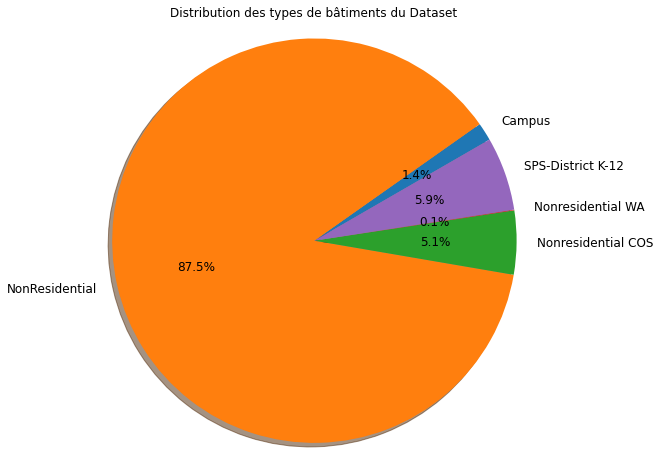

In [41]:
building_type = energy.groupby(by='BuildingType')['OSEBuildingID'].nunique()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12))
ax.axis('equal')
ax.set_title("Distribution des types de bâtiments du Dataset")
plt.show()


In [42]:
energy.loc[(energy['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    288
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

Text(0.5, 1.0, 'Distribution des années de construction des bâtiments\n')

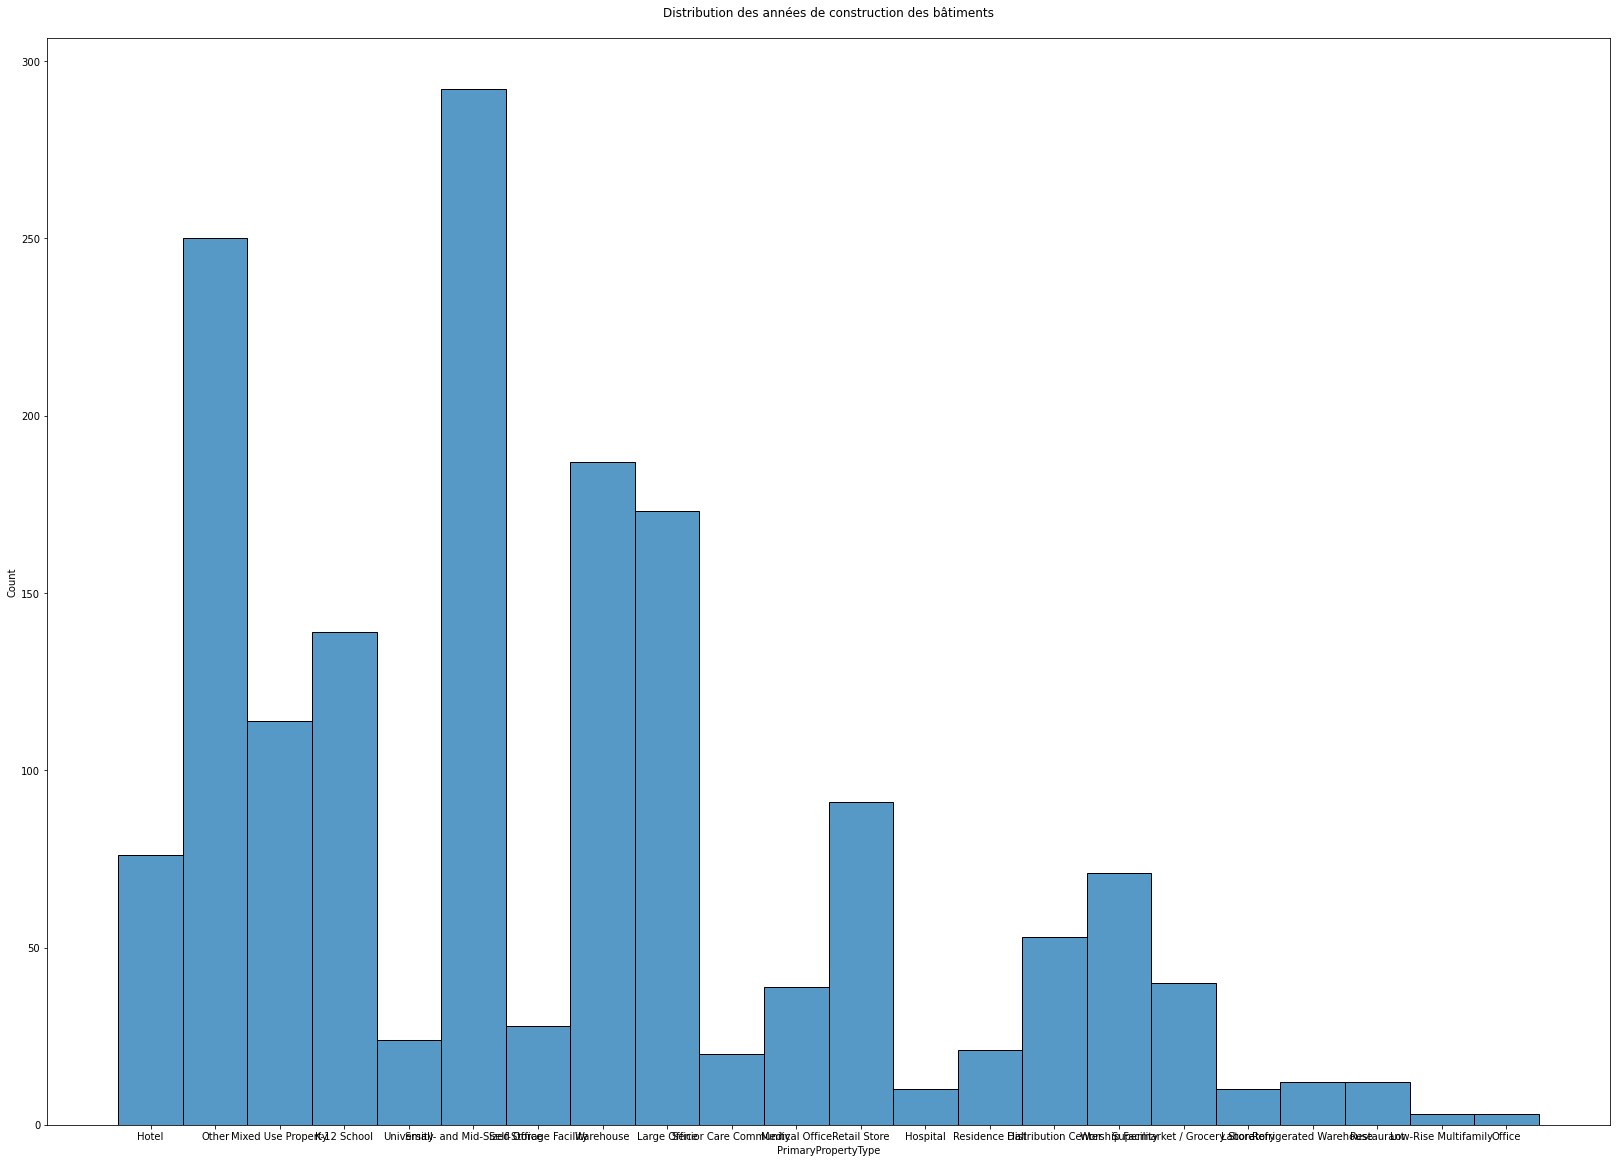

In [43]:
fig = plt.figure(figsize=(28,20))
ax = sns.histplot(data=energy, x='PrimaryPropertyType', bins= 80 )
ax.set_xlabel("PrimaryPropertyType")
plt.title(f"Distribution des années de construction des bâtiments\n")

## Les années de construction

Text(0.5, 1.0, 'Distribution des années de construction des bâtiments\n')

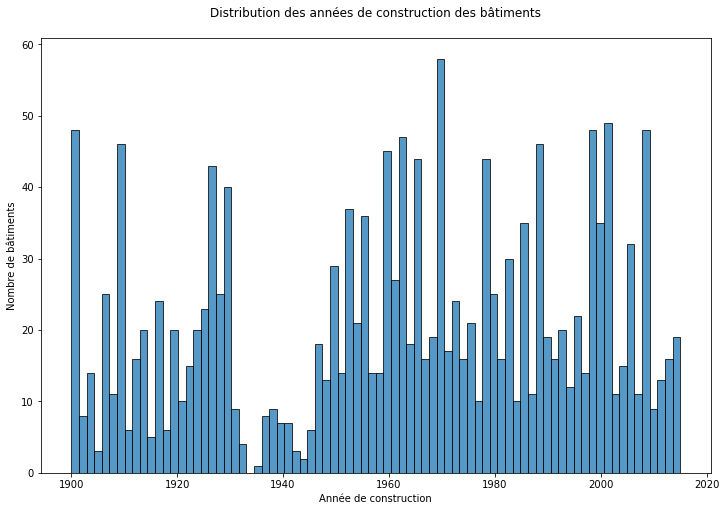

In [44]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=energy, x='YearBuilt', bins=80)
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")

***Plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. Nous allons donc créer cette nouvelle variable et supprimer l'année de construction***

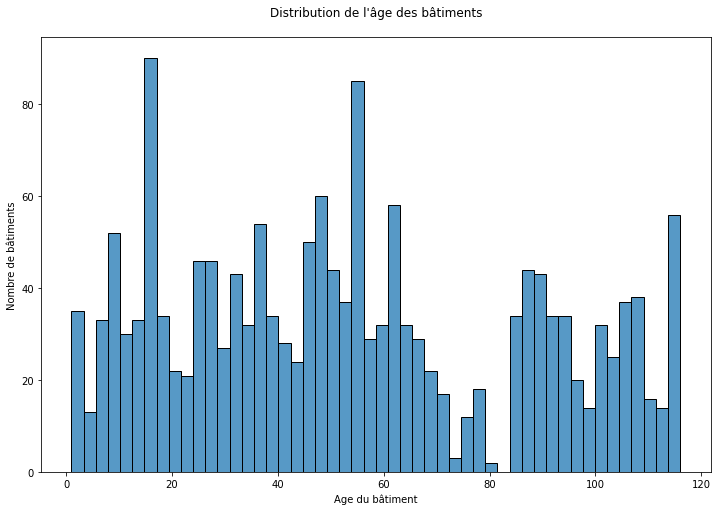

In [45]:
energy['Âgebâtiment'] = energy['DataYear'] - energy['YearBuilt']
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=energy, x='Âgebâtiment', bins=50)
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

In [46]:
energy['Âgebâtiment'].mean()

54.0863309352518

### Ce que nous disent Outlier ?

In [47]:
energy.groupby(['Outlier']).head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Âgebâtiment
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83,89
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86,20
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19,47
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67,90
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88,36
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.00,1.166315e+07,39794668.0,16048.309570,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10,58
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.00,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03,29
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.00,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19,103
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Ellio

In [48]:
energy["Outlier"] = energy["Outlier"].fillna('Not outlier')

In [49]:
print(energy.groupby(["ComplianceStatus"])["BuildingType","SiteEnergyUseWN(kBtu)","SteamUse(kBtu)","Electricity(kBtu)","TotalGHGEmissions", "Âgebâtiment"].mean())

                              SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
ComplianceStatus                                                      
Compliant                              8.441981e+06   551183.055286   
Error - Correct Default Data           3.249695e+06     8119.587358   
Missing Data                           0.000000e+00        0.000000   
Non-Compliant                          5.134922e+06        0.000000   

                              Electricity(kBtu)  TotalGHGEmissions  \
ComplianceStatus                                                     
Compliant                          6.140840e+06         193.608908   
Error - Correct Default Data       1.675469e+06          80.138750   
Missing Data                       8.312924e+05          56.916429   
Non-Compliant                      4.384917e+06          38.118125   

                              Âgebâtiment  
ComplianceStatus                           
Compliant                       54.355943  
Error - Correct Defa

In [50]:
df_energy = energy[energy['Outlier'].notna()]


In [51]:
df_energy['out_clas'] = 'Low'
index_out = df_energy['Outlier'].str.contains('High')
df_energy.loc[index_out,'out_clas'] = 'High'

In [52]:
df_energy['out_clas']

0       Low
1       Low
2       Low
3       Low
4       Low
       ... 
3371    Low
3372    Low
3373    Low
3374    Low
3375    Low
Name: out_clas, Length: 1668, dtype: object

In [53]:
print(df_energy.groupby(["out_clas"])["BuildingType","SiteEnergyUseWN(kBtu)","SteamUse(kBtu)","Electricity(kBtu)","TotalGHGEmissions", "Âgebâtiment"].min())

            BuildingType  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
out_clas                                                          
High      NonResidential             27137190.0             0.0   
Low               Campus                    0.0             0.0   

          Electricity(kBtu)  TotalGHGEmissions  Âgebâtiment  
out_clas                                                     
High             27137187.0             189.18           16  
Low               -115417.0              -0.80            1  


In [54]:
print(df_energy.groupby(["out_clas"])["BuildingType","SiteEnergyUseWN(kBtu)","SteamUse(kBtu)","Electricity(kBtu)","TotalGHGEmissions", "Âgebâtiment"].mean())

          SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
out_clas                                                             
High               3.439380e+07        0.000000       3.346593e+07   
Low                8.033126e+06   513188.637782       5.810293e+06   

          TotalGHGEmissions  Âgebâtiment  
out_clas                                  
High              275.92000    37.000000  
Low               184.86399    54.106843  


In [55]:
df_energy.groupby(['out_clas']).head(17)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Âgebâtiment,out_clas
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,Not outlier,249.98,2.83,89,Low
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,Not outlier,295.86,2.86,20,Low
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,Not outlier,2089.28,2.19,47,Low
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,Not outlier,286.43,4.67,90,Low
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,Not outlier,505.01,2.88,36,Low
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,136.100006,141.600006,316.299988,320.500000,12086616.0,12581712.0,0.00,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,Not outlier,301.81,3.10,17,Low
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5758795.0,6062767.5,0.00,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,Not outlier,176.14,2.12,90,Low
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,DOWNTOWN,47.61327,-122.33136,1926,1.0,8,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,61.299999,68.800003,141.699997,152.300003,6298131.5,7067881.5,2276286.50,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,Not outlier,221.51,2.16,90,Low
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA

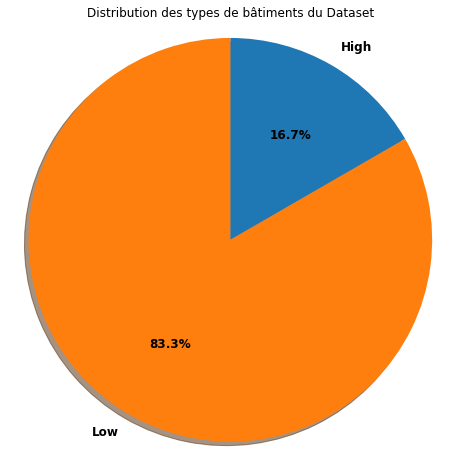

In [56]:
building_type = df_energy.groupby(by='out_clas')['BuildingType'].nunique()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Distribution des types de bâtiments du Dataset")
plt.show()

In [57]:
#Regardent a High outlier 
len(df_energy['TotalGHGEmissions'] > 362.66 )

1668

In [58]:
len(df_energy['TotalGHGEmissions'] > 189 )

1668

In [59]:
len(df_energy['TotalGHGEmissions'] < 29.43 )

1668

##### Donc on peut supprıme ces valeur comme outlier

In [60]:
energy = df_energy[df_energy['TotalGHGEmissions'] < 189]

In [61]:
energy = df_energy[df_energy['TotalGHGEmissions'] > 29.43] 

In [62]:
energy['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [63]:
len(energy['ComplianceStatus'])

1100

In [64]:
energy = energy[~energy['ComplianceStatus'].str.contains("Non-Compliant")]
energy['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data'],
      dtype=object)

#### Source principale d'énergie

In [65]:
energy[["Electricity(kBtu)","NaturalGas(kBtu)","SteamUse(kBtu)"]]

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu)
0,3.946027e+06,1.276453e+06,2003882.00
1,3.242851e+06,5.145082e+06,0.00
2,4.952666e+07,1.493800e+06,21566554.00
3,2.768924e+06,1.811213e+06,2214446.25
4,5.368607e+06,8.803998e+06,0.00
...,...,...,...
3367,1.260870e+06,4.715376e+06,0.00
3368,7.694531e+05,1.043951e+06,0.00
3372,3.965461e+05,5.537300e+05,0.00
3373,1.792159e+06,3.973739e+06,0.00


In [66]:
energy = energy[energy['Electricity(kBtu)'] > 0]

In [67]:
energy[["Electricity(kBtu)","NaturalGas(kBtu)","SteamUse(kBtu)"]].describe()

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu)
count,1.093000e+03,1.093000e+03,1.093000e+03
mean,8.252827e+06,2.926946e+06,7.808343e+05
std,2.530010e+07,1.144772e+07,6.793202e+06
min,3.000000e+00,0.000000e+00,0.000000e+00
25%,1.051644e+06,5.040460e+05,0.000000e+00
50%,2.998320e+06,1.006018e+06,0.000000e+00
75%,7.486064e+06,2.542771e+06,0.000000e+00
max,6.570744e+08,2.979090e+08,1.349435e+08


In [68]:
def consumption_rateE(score):
    if score < 3.72:
        grade ='Low Usage'
    else :
        grade='High Usage'
    return grade

energy['consumption_rate_Electricity']= energy['Electricity(kBtu)'].apply(consumption_rateE)

In [69]:
energy['consumption_rate_Electricity']

0       High Usage
1       High Usage
2       High Usage
3       High Usage
4       High Usage
           ...    
3367    High Usage
3368    High Usage
3372    High Usage
3373    High Usage
3375    High Usage
Name: consumption_rate_Electricity, Length: 1093, dtype: object

In [70]:
def consumption_rateG(score):
    if score < 1.36:
        label ='Low Usage'
    else :
        label = 'High Usage'
    return label

energy['consumption_rate_Gas']=energy['NaturalGas(kBtu)'].apply(consumption_rateG)

In [71]:
energy['consumption_rate_Gas']

0       High Usage
1       High Usage
2       High Usage
3       High Usage
4       High Usage
           ...    
3367    High Usage
3368    High Usage
3372    High Usage
3373    High Usage
3375    High Usage
Name: consumption_rate_Gas, Length: 1093, dtype: object

In [72]:
def consumption_rateS(score):
    if score <2.75:
        grade ='Low Usage'
    else :
        grade='High Usage'
    return grade

energy['consumption_rate_Steam']= energy['SteamUse(kBtu)'].apply(consumption_rateS)

In [73]:
energy['consumption_rate_Steam'].head()

0    High Usage
1     Low Usage
2    High Usage
3    High Usage
4     Low Usage
Name: consumption_rate_Steam, dtype: object

In [74]:
energy.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Âgebâtiment,out_clas,consumption_rate_Electricity,consumption_rate_Gas,consumption_rate_Steam
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,Not outlier,249.98,2.83,89,Low,High Usage,High Usage,High Usage
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,Not outlier,295.86,2.86,20,Low,High Usage,High Usage,Low Usage
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,Not outlier,2089.28,2.19,47,Low,High Usage,High Usage,High Usage
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,Not outlier,286.43,4.67,90,Low,High Usage,High Usage,High Usage
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,Not outlier,505.01,2.88,36,Low,High Usage,High Usage,Low Usage


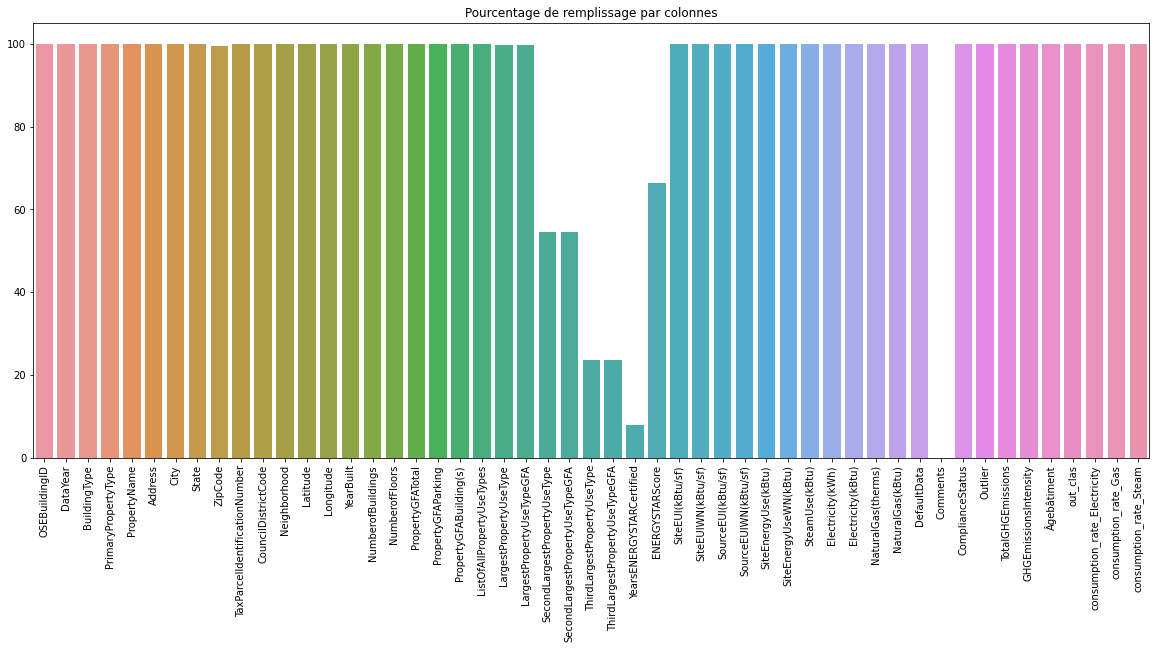

In [75]:
nb_row=energy.shape[0]

percentage=energy.apply(lambda x:(x.notna().sum()/nb_row)*100)

columns=energy.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [76]:
energy.drop(["Electricity(kBtu)","NaturalGas(kBtu)","SteamUse(kBtu)"], axis=1, inplace = True)

In [77]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 3375
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1093 non-null   int64  
 1   DataYear                         1093 non-null   int64  
 2   BuildingType                     1093 non-null   object 
 3   PrimaryPropertyType              1093 non-null   object 
 4   PropertyName                     1093 non-null   object 
 5   Address                          1093 non-null   object 
 6   City                             1093 non-null   object 
 7   State                            1093 non-null   object 
 8   ZipCode                          1087 non-null   float64
 9   TaxParcelIdentificationNumber    1093 non-null   object 
 10  CouncilDistrictCode              1093 non-null   int64  
 11  Neighborhood                     1093 non-null   object 
 12  Latitude            

In [78]:
energy.drop(["PropertyName", "City", "State","YearBuilt","SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA","YearsENERGYSTARCertified","DefaultData","Comments","Outlier","NaturalGas(therms)"], axis=1, inplace = True)

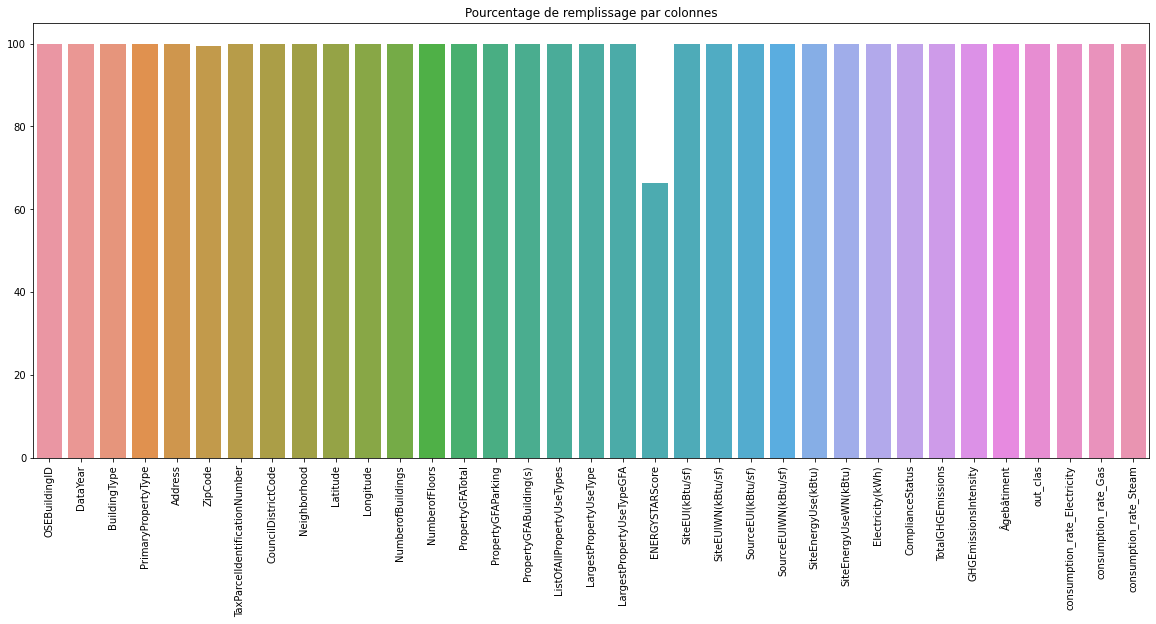

In [79]:
nb_row=energy.shape[0]

percentage=energy.apply(lambda x:(x.notna().sum()/nb_row)*100)

columns=energy.columns

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(x=columns,y=percentage)

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

On vas utilise les variable WN, donc on peut supprime les variabla sans wn

In [80]:
energy = energy.drop(['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)'], axis=1)

### Vérification des valeurs négatives

In [81]:
energy.min()

OSEBuildingID                                      1
DataYear                                        2016
BuildingType                                  Campus
PrimaryPropertyType              Distribution Center
Address                                100 4th Ave N
ZipCode                                        98006
TaxParcelIdentificationNumber             0001800033
CouncilDistrictCode                                1
Neighborhood                                 BALLARD
Latitude                                     47.4992
Longitude                                   -122.408
NumberofBuildings                                  0
NumberofFloors                                     0
PropertyGFATotal                               12769
PropertyGFAParking                                 0
PropertyGFABuilding(s)                          3636
ListOfAllPropertyUseTypes            Adult Education
LargestPropertyUseTypeGFA                       5656
ENERGYSTARScore                               

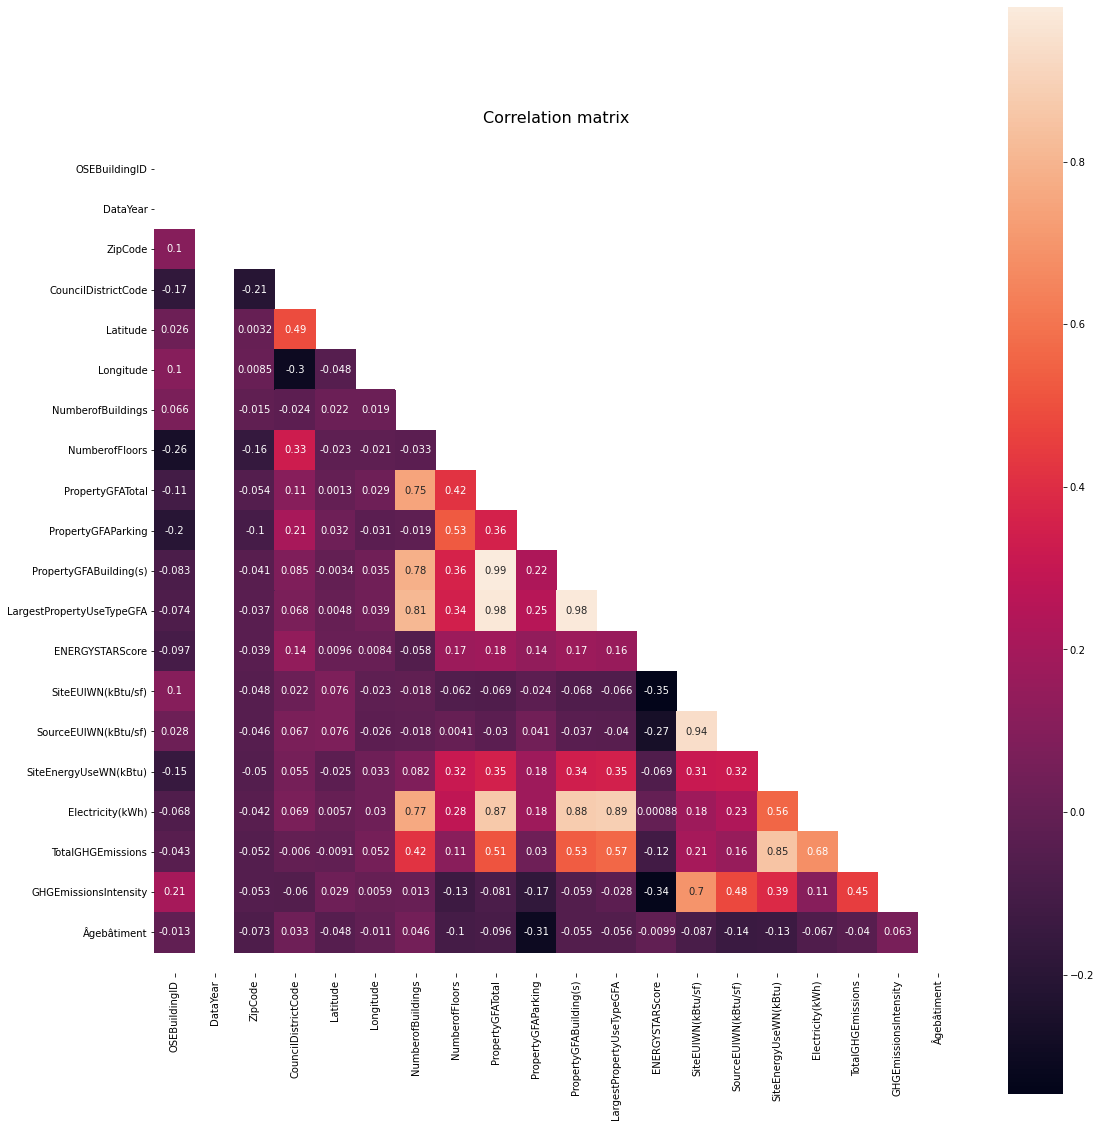

In [82]:
#Heatmap
corr_matrix=energy.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 20))
sns.heatmap(corr_matrix, mask=mask, square=True,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation matrix',fontsize=16)
plt.show()

In [83]:
threshold = 0.7
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
22,PropertyGFATotal,PropertyGFABuilding(s),0.990346
20,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.982501
18,LargestPropertyUseTypeGFA,PropertyGFATotal,0.977860
16,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),0.942960
14,Electricity(kWh),LargestPropertyUseTypeGFA,0.887797
12,Electricity(kWh),PropertyGFABuilding(s),0.876833
10,PropertyGFATotal,Electricity(kWh),0.865489
8,TotalGHGEmissions,SiteEnergyUseWN(kBtu),0.853192
6,LargestPropertyUseTypeGFA,NumberofBuildings,0.808038
4,NumberofBuildings,PropertyGFABuilding(s),0.783293


On remarque que les variables suffixées GFA présentent de fortes corrélations avec plusieurs autres variables. Nous allons donc créer de nouvelles variables pour tenter de gommer ces corrélations linéaires :

Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et nous conserverons uniquement ces 2 variables

In [84]:
energy['GFABuildingRate'] = (round((energy['PropertyGFABuilding(s)'].fillna(0)
                                  /energy['PropertyGFATotal'].fillna(0)),5))
energy['GFAParkingRate'] = (round((energy['PropertyGFAParking'].fillna(0)
                                 /energy['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles
energy.drop(['LargestPropertyUseTypeGFA', 
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

Nous pouvons également calculer la surface moyenne par bâtiment et par étage :

In [85]:
energy['GFAPerBuilding'] = round((energy['PropertyGFATotal'] / energy['NumberofBuildings']),3)
energy['GFAPerFloor'] = round((energy['PropertyGFATotal'] / energy['NumberofFloors']),3)

In [86]:
energy.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Âgebâtiment', 'out_clas',
       'consumption_rate_Electricity', 'consumption_rate_Gas',
       'consumption_rate_Steam', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor'],
      dtype='object')

In [87]:
energy['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'North', 'Delridge', 'Northwest', 'Ballard', 'Central'],
      dtype=object)

In [88]:
energy['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
energy['Neighborhood']=energy['Neighborhood'].map(lambda x: x.upper())

In [89]:
energy['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

In [90]:
energy = energy[~((energy['SiteEnergyUseWN(kBtu)'].isnull()) | (energy['TotalGHGEmissions'].isnull()))]

In [91]:
energy.loc[energy['SiteEnergyUseWN(kBtu)']==0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),Electricity(kWh),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Âgebâtiment,out_clas,consumption_rate_Electricity,consumption_rate_Gas,consumption_rate_Steam,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
220,343,2016,NonResidential,Large Office,801 2nd Ave Suite 1300,98104.0,0939000355,7,DOWNTOWN,47.60370,-122.33447,1.0,17,378525,"Office, Parking",Office,69.0,0.0,0.0,0.0,4.098788e+06,Compliant,940.47,2.48,58,Low,High Usage,Low Usage,High Usage,0.77650,0.22350,378525.000,22266.176
247,372,2016,NonResidential,Large Office,1730 Minor Avenue,98101.0,0660002410,7,DOWNTOWN,47.61695,-122.32965,1.0,20,497513,"Office, Parking",Office,65.0,0.0,0.0,0.0,7.796691e+06,Compliant,197.19,0.40,28,Low,High Usage,High Usage,Low Usage,0.76132,0.23868,497513.000,24875.650
284,414,2016,NonResidential,Large Office,1411 4TH AVE,98101.0,1975700345,7,DOWNTOWN,47.60923,-122.33625,1.0,15,151039,Office,Office,84.0,0.0,0.0,0.0,7.610041e+05,Compliant,238.09,1.58,87,Low,High Usage,Low Usage,High Usage,1.00000,0.00000,151039.000,10069.267
3274,49967,2016,Campus,University,NE 45th St & Brooklyn Ave,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,111.0,0,9320156,College/University,College/University,NaN,0.0,0.0,0.0,1.925775e+08,Compliant,11140.56,1.20,116,Low,High Usage,Low Usage,High Usage,1.00000,0.00000,83965.369,inf
3277,49972,2016,NonResidential,University,3785 E Stevens Way NE,98195.0,1625049001,4,NORTHEAST,47.65356,-122.30613,1.0,6,203030,College/University,College/University,NaN,0.0,0.0,0.0,8.386464e+06,Compliant,199.48,0.98,18,Low,High Usage,Low Usage,Low Usage,1.00000,0.00000,203030.000,33838.333


In [92]:
energy=energy[~(energy['SiteEnergyUseWN(kBtu)'] ==0)]

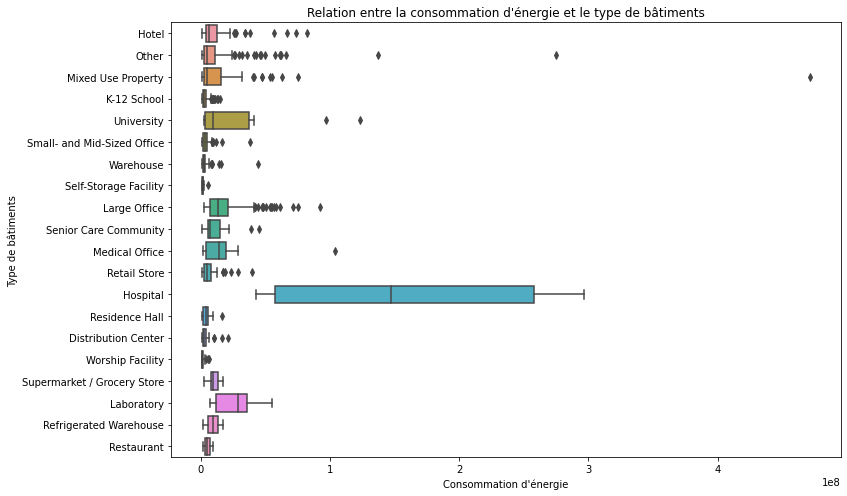

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(x="SiteEnergyUseWN(kBtu)", y="PrimaryPropertyType", data=energy)
plt.xlabel("Consommation d'énergie")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre la consommation d'énergie et le type de bâtiments")
plt.show()

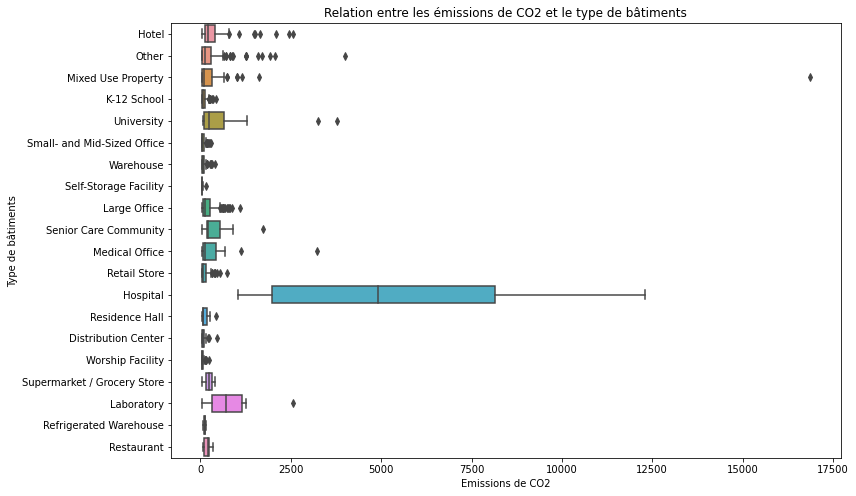

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=energy)
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre les émissions de CO2 et le type de bâtiments")
plt.show()

In [95]:
#!pip install folium

In [96]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[energy['Latitude'].mean(), energy['Longitude'].mean()],zoom_start=11)
for i in range(0,len(energy)):
    folium.Circle([energy.iloc[i]['Latitude'],energy.iloc[i]['Longitude']], 
                      popup=energy.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

In [97]:
#On supprime les colonnes 
energy=energy.drop(['Latitude','Longitude','Address'] ,axis=1 )

In [98]:
cols = ['TotalGHGEmissions','SiteEnergyUseWN(kBtu)','BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType',
                   'consumption_rate_Electricity','consumption_rate_Gas','consumption_rate_Steam', 'NumberofBuildings','NumberofFloors',
                    'PropertyGFATotal','Âgebâtiment','GFABuildingRate','GFAParkingRate',
                    'GFAPerBuilding','GFAPerFloor']
for col in cols:
    energy=energy.drop(energy[energy[col].isnull()].index)
energy.reset_index(drop=True,inplace=True)

In [99]:
print(energy.shape)

(1085, 30)


In [100]:
energy.set_index("OSEBuildingID").to_csv("energy-cleaned.csv")